<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/08-01/La2_3c_2Vpp_Hgating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1530, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1530 (delta 82), reused 17 (delta 17), pack-reused 1411
Receiving objects: 100% (1530/1530), 103.66 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (904/904), done.
Updating files: 100% (198/198), done.


'/content'

### 24-07-25 La2/3-c Hgating
**Only use HMIM-TFSI**
In this experiment, the lithium electrode is still used! In subsequent H-gating experiments, the lithium electrode is replaced with carbon.

Gate voltage parameters :
- Amp : 2Vpp
- Offset : 500 mV
- Duty Cycle : 1%
- Power supply: 1V

 Time 1250: Start gating



In [3]:
%cd "/content/gator/data/08-01/"

/content/gator/data/08-01


In [6]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[7:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [7]:
prep_csv('defbuffer1_0801_124710.csv')
df = pd.read_csv('defbuffer1_0801_124710.csv')


Capacity,100000



In [8]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.008795,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1,T,2W,F,F,0.000000
1,0.008785,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999961,Volt DC,1,T,2W,F,F,0.069397
2,0.008779,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999960,Volt DC,1,T,2W,F,F,0.138744
3,0.008776,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999962,Volt DC,1,T,2W,F,F,0.208105
4,0.008771,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999962,Volt DC,1,T,2W,F,F,0.277431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21473,0.009384,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999946,Volt DC,1,T,2W,F,F,1490.760285
21474,0.009384,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999945,Volt DC,1,T,2W,F,F,1490.829592
21475,0.009384,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999946,Volt DC,1,T,2W,F,F,1490.898908
21476,0.009384,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999945,Volt DC,1,T,2W,F,F,1490.968226


In [9]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e12

# Potential (mV)
V = df['Value'] * 1e3

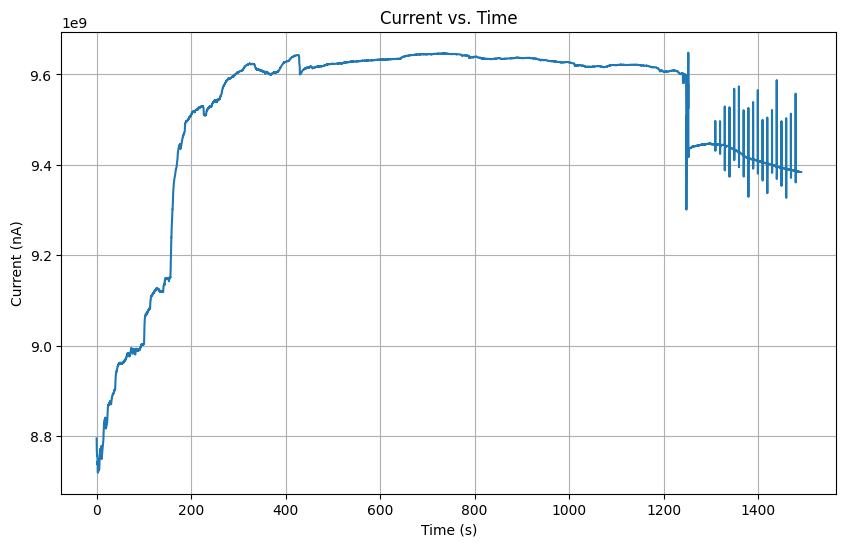

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(T, I)

plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.title('Current vs. Time')

plt.grid(True)
plt.show()


In [13]:
fig = px.scatter(df, x="Relative Time", y=["Reading"])
fig.show()
